(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

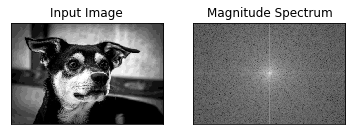

In [161]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img = cv2.imread('dog.png',0)

f = np.fft.fft2(img_in)
fourier = np.fft.fftshift(f)


magnitude_spectrum = 20*np.log(np.abs(fourier))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')

# plt.imshow(img_in, cmap = 'gray')
# plt.imshow(mag_f, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


Image raw size :
 350 524 4
Image gray size :
 350 524


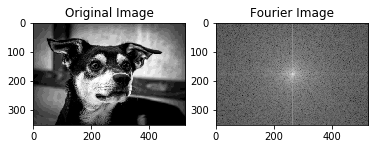

In [163]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('dog.png')
img_in = np.array(img)
img_dim= np.size(img_in.shape)

# #Make image to 2 dimension graysclae image
if(img_dim==3):
    height,width,depth = img_in.shape
    print('Image raw size :\n',height,width,depth)
    #convert 3D image to 2D image
    img_in=img_in[:,:,0]
    height,width = img_in.shape
    print('Image gray size :\n',height,width)
    
else:
    height,width = img_in.shape
    print('Image gray size :\n',height,width)
    
# perform the 2-D fast Fourier transform on the image data
fourier = np.fft.fft2(img_in)
# move the zero-frequency component to the center of the Fourier spectrum
fourier = np.fft.fftshift(fourier)
# compute the magnitudes (absolute values) of the complex numbers
fourier = np.abs(fourier)
# compute the common logarithm of each value to reduce the dynamic range
fourier = np.log10(fourier)
# find the minimum value that is a finite number
lowest = np.nanmin(fourier[np.isfinite(fourier)])
# find the maximum value that is a finite number
highest = np.nanmax(fourier[np.isfinite(fourier)])
# calculate the original contrast range
original_range = highest - lowest
# normalize the Fourier image data ("stretch" the contrast)
norm_fourier = (fourier - lowest) / original_range * 255
# convert the normalized data into an image
norm_fourier_img = Image.fromarray(norm_fourier.astype(np.uint8))

# display the original image and the Fourier image
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img, cmap='gray')
ax2.imshow(norm_fourier_img, cmap='gray')
ax1.title.set_text('Original Image')
ax2.title.set_text('Fourier Image')


# show the normalized Fourier image
norm_fourier_img.show()

# # convert the output image to 8-bit pixels (grayscale) and save it
# norm_fourier_img.convert('L').save('test.bmp')